## Regresiones lineales

In [258]:
import math as m
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [259]:
def getTestSizeTrainSize(dataFrame, testSplit):
    return m.ceil(shuffledDataFrame.shape[0]*(1-testSplit)), m.floor(shuffledDataFrame.shape[0]*testSplit)

def getTrainData(shuffledDataFrame, trainSize):
    return shuffledDataFrame.iloc[0:trainSize, :8], shuffledDataFrame.iloc[0:trainSize, 8:9]

def getTestData(shuffledDataFrame, trainSize, testSize):
    return shuffledDataFrame.iloc[trainSize:trainSize+trainSize, :8], shuffledDataFrame.iloc[trainSize:trainSize+trainSize, 8:9]

def standarizeDataFrame(dataFrame):
    scaled = pd.DataFrame(scaler.fit_transform(dataFrame))
    scaled.columns = dataFrame.columns
    return scaled

def getScore(model, dataX, dataY):
    return model.score(dataX, dataY)

def getMSE(model, dataX, dataY):
    return np.mean((model.predict(dataX) - dataY)**2).values[0]

def plotModel(testDataPredictions, testRealData, testMSE, allDataPredictions, allRealData, allMSE):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,10))

    ax1.scatter(testDataPredictions, testRealData, s=10)
    ax1.plot([testRealData.min(), testRealData.max()], [testRealData.min(), testRealData.max()], 'k--', lw=2)
    ax1.set_title(f"Valores de test \n MSE: {np.round(testMSE,3)}")
    ax1.set_xlabel("Predicciones")
    ax1.set_ylabel("Valores reales")

    ax2.scatter(allDataPredictions, allRealData, s=10)
    ax2.plot([allRealData.min(), allRealData.max()], [allRealData.min(), allRealData.max()], 'k--', lw=2)
    ax2.set_title(f"Todos los valores \n MSE: {np.round(allMSE,3)}")
    ax2.set_xlabel("Predicciones")
    ax2.set_ylabel(f"Valores reales")

    ax1.axis('square')
    ax2.axis('square')
    plt.tight_layout()
    plt.show()

In [260]:
originalDataFrame = pd.read_csv('Database/Concrete_Data_Yeh.csv')
splitRatio = 0.2

### 1. Regresión básica y completa

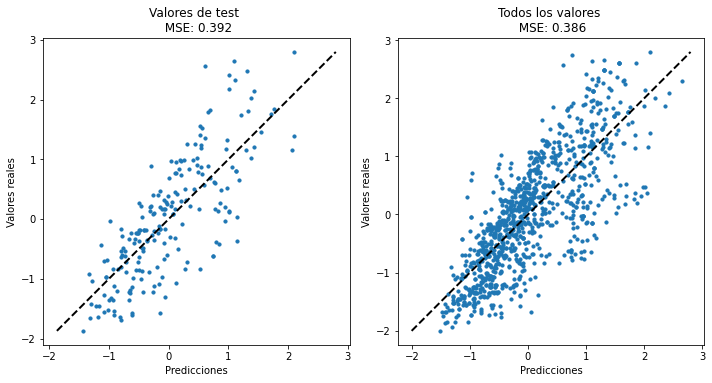

In [262]:
shuffledDataFrame = originalDataFrame.sample(frac=1)
shuffledDataFrame = standarizeDataFrame(shuffledDataFrame)
testSize, trainSize = getTestSizeTrainSize(shuffledDataFrame, splitRatio)

trainX, trainY = getTrainData(shuffledDataFrame, testSize)
testX, testY = getTestData(shuffledDataFrame, trainSize, testSize)

linearModel1 = linear_model.LinearRegression()
linearModel1.fit(trainX, trainY)

testMSE = getMSE(linearModel1, testX, testY)
allMSE = getMSE(linearModel1, shuffledDataFrame.iloc[:, :8], shuffledDataFrame.iloc[:, 8:9])

testDataPredictions = linearModel1.predict(testX)
testRealData = testY
allDataPredictions = linearModel1.predict(shuffledDataFrame.iloc[:, :8])
allRealData = shuffledDataFrame.iloc[:, 8:9]

plotModel(testDataPredictions, testRealData, testMSE, allDataPredictions, allRealData, allMSE)

### 2. Regresión básica con componentes principales

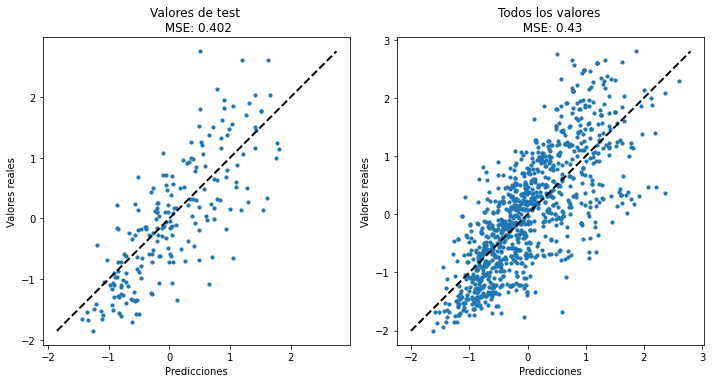

In [264]:
shuffledDataFrame = originalDataFrame.sample(frac=1)
shuffledDataFrame = standarizeDataFrame(shuffledDataFrame)
testSize, trainSize = getTestSizeTrainSize(shuffledDataFrame, splitRatio)

trainX, trainY = getTrainData(shuffledDataFrame, testSize)
testX, testY = getTestData(shuffledDataFrame, trainSize, testSize)
trainX = trainX[['cement', 'water', 'coarseaggregate', 'fineaggregate', 'superplasticizer', 'age']]
testX = testX[['cement', 'water', 'coarseaggregate', 'fineaggregate', 'superplasticizer', 'age']]

linearModel2 = linear_model.LinearRegression()
linearModel2.fit(trainX, trainY)

testMSE = getMSE(linearModel2, testX, testY)
allMSE = getMSE(linearModel2, shuffledDataFrame[['cement', 'water', 'coarseaggregate', 'fineaggregate', 'superplasticizer', 'age']], shuffledDataFrame.iloc[:, 8:9])

testDataPredictions = linearModel2.predict(testX)
testRealData = testY
allDataPredictions = linearModel2.predict(shuffledDataFrame[['cement', 'water', 'coarseaggregate', 'fineaggregate', 'superplasticizer', 'age']])
allRealData = shuffledDataFrame.iloc[:, 8:9]

plotModel(testDataPredictions, testRealData, testMSE, allDataPredictions, allRealData, allMSE)

### 3. Regresión completa tranformando variables

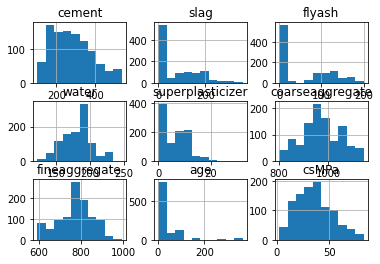

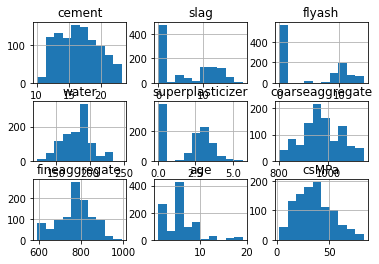

In [265]:
shuffledDataFrame = originalDataFrame.sample(frac=1)

shuffledDataFrame.hist()

shuffledDataFrame['cement'] = np.sqrt(shuffledDataFrame['cement'])
shuffledDataFrame['flyash'] = np.sqrt(shuffledDataFrame['flyash'])
shuffledDataFrame['slag'] = np.sqrt(shuffledDataFrame['slag'])
shuffledDataFrame['superplasticizer'] = np.sqrt(shuffledDataFrame['superplasticizer'])
shuffledDataFrame['age'] = np.sqrt(shuffledDataFrame['age'])

shuffledDataFrame.hist()
plt.show()

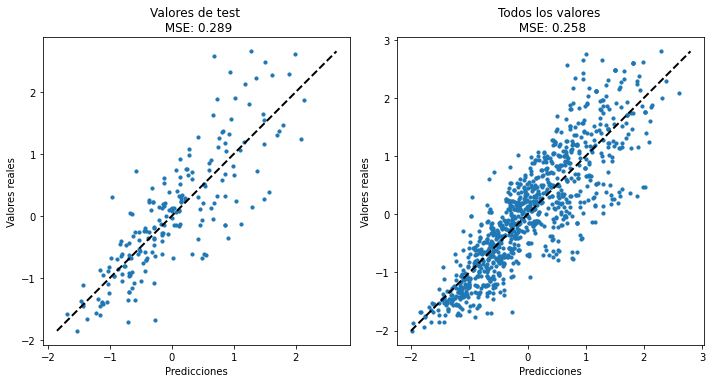

In [269]:
shuffledDataFrame = standarizeDataFrame(shuffledDataFrame)
testSize, trainSize = getTestSizeTrainSize(shuffledDataFrame, splitRatio)

trainX, trainY = getTrainData(shuffledDataFrame, testSize)
testX, testY = getTestData(shuffledDataFrame, trainSize, testSize)

linearModel3 = linear_model.LinearRegression()
linearModel3.fit(trainX, trainY)

'''
print(f'Training score: {getScore(linearModel3, trainX, trainY)}')
print(f'Training MSE: {getMSE(linearModel3, trainX, trainY)}')
print(f'Test score: {getScore(linearModel3, testX, testY)}')
print(f'Test MSE: {getMSE(linearModel3, testX, testY)}')
'''
testMSE = getMSE(linearModel3, testX, testY)
allMSE = getMSE(linearModel3, shuffledDataFrame.iloc[:, :8], shuffledDataFrame.iloc[:, 8:9])

testDataPredictions = linearModel3.predict(testX)
testRealData = testY
allDataPredictions = linearModel3.predict(shuffledDataFrame.iloc[:, :8])
allRealData = shuffledDataFrame.iloc[:, 8:9]

plotModel(testDataPredictions, testRealData, testMSE, allDataPredictions, allRealData, allMSE)

### 4. Regresión transformando variables y eliminando filas

In [29]:
shuffledDataFrame = originalDataFrame.sample(frac=1)

shuffledDataFrame = shuffledDataFrame.query('slag != 0 and flyash!= 0 and superplasticizer != 0')


shuffledDataFrame['cement'] = np.sqrt(shuffledDataFrame['cement'])
shuffledDataFrame['slag'] = np.sqrt(shuffledDataFrame['slag'])


testSize, trainSize = getTestSizeTrainSize(shuffledDataFrame, splitRatio)

trainX, trainY = getTrainData(shuffledDataFrame, testSize)
testX, testY = getTestData(shuffledDataFrame, trainSize, testSize)

linearModel4 = linear_model.LinearRegression()
linearModel4.fit(trainX, trainY)

print(f'Training score: {getScore(linearModel4, trainX, trainY)}')
print(f'Training MSE: {getMSE(linearModel4, trainX, trainY)}')
print(f'Test score: {getScore(linearModel4, testX, testY)}')
print(f'Test MSE: {getMSE(linearModel4, testX, testY)}')

Training score: 0.6745526095306501
Training MSE: csMPa    62.908176
dtype: float64
Test score: 0.6318703151964382
Test MSE: csMPa    80.947175
dtype: float64
